## 1) Introduction

You will work with data from the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course) to predict home prices in Iowa using 79 explanatory variables describing (almost) every aspect of the homes.  

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)

Run the next code cell without changes to load the training and validation features in `X_train` and `X_valid`, along with the prediction targets in `y_train` and `y_valid`.  The test features are loaded in `X_test`.  (_If you need to review **features** and **prediction targets**, please check out [this short tutorial](https://www.kaggle.com/dansbecker/your-first-machine-learning-model).  To read about model **validation**, look [here](https://www.kaggle.com/dansbecker/model-validation).  Alternatively, if you'd prefer to look through a full course to review all of these topics, start [here](https://www.kaggle.com/learn/machine-learning).)_

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('data/train.csv', index_col='Id')
X_test_full = pd.read_csv('data/test.csv', index_col='Id')

# Obtain target and predictors
y = X_full.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [65]:
X_train.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
619,11694,2007,1828,0,2,3,9
871,6600,1962,894,0,1,2,5
93,13360,1921,964,0,1,2,5
818,13265,2002,1689,0,2,3,7
303,13704,2001,1541,0,2,3,6


The next code cell defines five different random forest models.  Run this code cell without changes.  (_To review **random forests**, look [here](https://www.kaggle.com/dansbecker/random-forests)._)

In [66]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

To select the best model out of the five, we define a function score_model() below. This function returns the mean absolute error (MAE) from the validation set. Recall that the best model will obtain the lowest MAE. (To review mean absolute error, look here.)

Run the code cell without changes.

In [67]:
from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706


Use the above results to fill in the line below.  Which model is the best model?  Your answer should be one of `model_1`, `model_2`, `model_3`, `model_4`, or `model_5`.

In [68]:
best_model = model_3

Great. You know how to evaluate what makes an accurate model. Now it's time to go through the modeling process and make predictions. In the line below, create a Random Forest model with the variable name my_model.

In [69]:
my_model = RandomForestRegressor(random_state=1)

Run the next code cell without changes. The code fits the model to the training and validation data, and then generates test predictions that are saved to a CSV file. These test predictions can be submitted directly to the competition!

In [70]:
my_model.fit(X, y)

# Generate test predictions
preds_test = my_model.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## 2) Missing Values

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('data/train.csv', index_col='Id')
X_test_full = pd.read_csv('data/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll use only numerical predictors
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

Use the next code cell to print the first five rows of the data.

In [72]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,20,90.0,11694,9,5,2007,2007,452.0,48,0,...,774,0,108,0,0,260,0,0,7,2007
871,20,60.0,6600,5,5,1962,1962,0.0,0,0,...,308,0,0,0,0,0,0,0,8,2009
93,30,80.0,13360,5,7,1921,2006,0.0,713,0,...,432,0,0,44,0,0,0,0,8,2009
818,20,NaN,13265,8,5,2002,2002,148.0,1218,0,...,857,150,59,0,0,0,0,0,7,2008
303,20,118.0,13704,7,5,2001,2002,150.0,0,0,...,843,468,81,0,0,0,0,0,1,2006


You can already see a few missing values in the first several rows. In the next step, you'll obtain a more comprehensive understanding of the missing values in the dataset.

In [73]:
print(X_train.shape)

(1168, 36)


In [74]:
# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage    212
MasVnrArea       6
GarageYrBlt     58
dtype: int64


Use the above output to answer the questions below.

In [75]:
# Fill in the line below: How many rows are in the training data?
num_rows = 1168

# Fill in the line below: How many columns in the training data
# have missing values?
num_cols_with_missing = 3

# Fill in the line below: How many missing entries are contained in 
# all of the training data?
tot_missing = 276

To compare different approaches to dealing with missing values, you'll use the same `score_dataset()` function from the tutorial.  This function reports the [mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) (MAE) from a random forest model.

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In this step, you'll preprocess the data in `X_train` and `X_valid` to remove columns with missing values.  Set the preprocessed DataFrames to `reduced_X_train` and `reduced_X_valid`, respectively.  

In [77]:
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

In [78]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE (Drop columns with missing values):
17837.82570776256


Use the next code cell to impute missing values with the mean value along each column. Set the preprocessed DataFrames to imputed_X_train and imputed_X_valid. Make sure that the column names match those in X_train and X_valid.

In [79]:
from sklearn.impute import SimpleImputer

# Fill in the lines below: imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Fill in the lines below: imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [80]:
print("MAE (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE (Imputation):
18062.894611872147


In this final step, you'll use any approach of your choosing to deal with missing values.  Once you've preprocessed the training and validation features, you'll train and evaluate a random forest model.  Then, you'll preprocess the test data before generating predictions that can be submitted to the competition!

Use the next code cell to preprocess the training and validation data.  Set the preprocessed DataFrames to `final_X_train` and `final_X_valid`.  **You can use any approach of your choosing here!**  in order for this step to be marked as correct, you need only ensure:
- the preprocessed DataFrames have the same number of columns,
- the preprocessed DataFrames have no missing values, 
- `final_X_train` and `y_train` have the same number of rows, and
- `final_X_valid` and `y_valid` have the same number of rows.

In [81]:
# Imputation
final_imputer = SimpleImputer(strategy='median')
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(final_imputer.transform(X_valid))

# Imputation removed column names; put them back
final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns

Run the next code cell to train and evaluate a random forest model.  (*Note that we don't use the `score_dataset()` function above, because we will soon use the trained model to generate test predictions!*)

In [82]:
# Define and fit model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(final_X_train, y_train)

# Get validation predictions and MAE
preds_valid = model.predict(final_X_valid)
print("MAE (Your approach):")
print(mean_absolute_error(y_valid, preds_valid))

MAE (Your approach):
17791.59899543379


Use the next code cell to preprocess your test data. Make sure that you use a method that agrees with how you preprocessed the training and validation data, and set the preprocessed test features to final_X_test.

Then, use the preprocessed test features and the trained model to generate test predictions in preds_test.

In order for this step to be marked correct, you need only ensure:

the preprocessed test DataFrame has no missing values, and
final_X_test has the same number of rows as X_test.

In [83]:
# Fill in the line below: preprocess test data
final_X_test = pd.DataFrame(final_imputer.transform(X_test))

# Fill in the line below: get test predictions
preds_test = model.predict(final_X_test)

In [84]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission_missing_values.csv', index=False)

## 3) Categorical Variables

To compare different models, you'll use the same score_dataset() function from the tutorial. This function reports the mean absolute error (MAE) from a random forest model.

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = pd.read_csv('data/train.csv', index_col='Id') 
X_test = pd.read_csv('data/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll drop columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
X.drop(cols_with_missing, axis=1, inplace=True)
X_test.drop(cols_with_missing, axis=1, inplace=True)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

### Drop columns with categorical data

You'll get started with the most straightforward approach. Use the code cell below to preprocess the data in X_train and X_valid to remove columns with categorical data. Set the preprocessed DataFrames to drop_X_train and drop_X_valid, respectively.

In [87]:
# Fill in the lines below: drop columns in training and validation data
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

Run the next code cell to get the MAE for this approach.

In [88]:
print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
17837.82570776256


### Label encoding

Before jumping into label encoding, we'll investigate the dataset. Specifically, we'll look at the 'Condition2' column. The code cell below prints the unique entries in both the training and validation sets.

In [89]:
print("Unique values in 'Condition2' column in training data:", X_train['Condition2'].unique())
print("\nUnique values in 'Condition2' column in validation data:", X_valid['Condition2'].unique())

Unique values in 'Condition2' column in training data: ['Norm' 'PosA' 'Feedr' 'PosN' 'Artery' 'RRAe']

Unique values in 'Condition2' column in validation data: ['Norm' 'RRAn' 'RRNn' 'Artery' 'Feedr' 'PosN']


If you now write code to:

fit a label encoder to the training data, and then
use it to transform both the training and validation data,
you'll get an error. Can you see why this is the case? (You'll need to use the above output to answer this question.)

Solution: Fitting a label encoder to a column in the training data creates a corresponding integer-valued label for each unique value that appears in the training data. In the case that the validation data contains values that don't also appear in the training data, the encoder will throw an error, because these values won't have an integer assigned to them. Notice that the 'Condition2' column in the validation data contains the values 'RRAn' and 'RRNn', but these don't appear in the training data -- thus, if we try to use a label encoder with scikit-learn, the code will throw an error.

This is a common problem that you'll encounter with real-world data, and there are many approaches to fixing this issue.  For instance, you can write a custom label encoder to deal with new categories.  The simplest approach, however, is to drop the problematic categorical columns.  

Run the code cell below to save the problematic columns to a Python list `bad_label_cols`.  Likewise, columns that can be safely label encoded are stored in `good_label_cols`.

In [90]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_valid[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be label encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'ExterQual', 'CentralAir', 'KitchenQual', 'PavedDrive', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Condition1', 'Exterior2nd', 'Neighborhood', 'HeatingQC', 'Foundation', 'ExterCond', 'RoofMatl', 'Heating', 'SaleType', 'RoofStyle', 'LandSlope', 'Utilities', 'Exterior1st', 'Condition2', 'Functional']


Use the next code cell to label encode the data in X_train and X_valid. Set the preprocessed DataFrames to label_X_train and label_X_valid, respectively.

We have provided code below to drop the categorical columns in bad_label_cols from the dataset.
You should label encode the categorical columns in good_label_cols.

In [91]:
from sklearn.preprocessing import LabelEncoder

# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)



# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in good_label_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

Run the next code cell to get the MAE for this approach.

In [92]:
print("MAE from Approach 2 (Label Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE from Approach 2 (Label Encoding):
17575.291883561644


### Investigating cardinality

So far, you've tried two different approaches to dealing with categorical variables.  And, you've seen that encoding categorical data yields better results than removing columns from the dataset.

Soon, you'll try one-hot encoding.  Before then, there's one additional topic we need to cover.  Begin by running the next code cell without changes.

In [93]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('ExterQual', 4),
 ('KitchenQual', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Condition2', 6),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('Heating', 6),
 ('Functional', 6),
 ('SaleCondition', 6),
 ('RoofMatl', 7),
 ('HouseStyle', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

The output above shows, for each column with categorical data, the number of unique values in the column.  For instance, the `'Street'` column in the training data has two unique values: `'Grvl'` and `'Pave'`, corresponding to a gravel road and a paved road, respectively.

We refer to the number of unique entries of a categorical variable as the **cardinality** of that categorical variable.  For instance, the `'Street'` variable has cardinality 2.

Use the output above to answer the questions below.

In [94]:
# Fill in the line below: How many categorical variables in the training data
# have cardinality greater than 10?
high_cardinality_numcols = 3

# Fill in the line below: How many columns are needed to one-hot encode the 
# 'Neighborhood' variable in the training data?
num_cols_neighborhood = 25

For large datasets with many rows, one-hot encoding can greatly expand the size of the dataset.  For this reason, we typically will only one-hot encode columns with relatively low cardinality.  Then, high cardinality columns can either be dropped from the dataset, or we can use label encoding.

As an example, consider a dataset with 10,000 rows, and containing one categorical column with 100 unique entries.  
- If this column is replaced with the corresponding one-hot encoding, how many entries are added to the dataset?  
- If we instead replace the column with the label encoding, how many entries are added?  

Use your answers to fill in the lines below.

In [95]:
# Fill in the line below: How many entries are added to the dataset by 
# replacing the column with a one-hot encoding?
OH_entries_added = 1e4*100 - 1e4

# Fill in the line below: How many entries are added to the dataset by
# replacing the column with a label encoding?
label_entries_added = 0

### One-hot encoding

In this step, you'll experiment with one-hot encoding. But, instead of encoding all of the categorical variables in the dataset, you'll only create a one-hot encoding for columns with cardinality less than 10.

Run the code cell below without changes to set low_cardinality_cols to a Python list containing the columns that will be one-hot encoded. Likewise, high_cardinality_cols contains a list of categorical columns that will be dropped from the dataset.

In [96]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Neighborhood', 'Exterior1st', 'Exterior2nd']


Use the next code cell to one-hot encode the data in `X_train` and `X_valid`.  Set the preprocessed DataFrames to `OH_X_train` and `OH_X_valid`, respectively.  
- The full list of categorical columns in the dataset can be found in the Python list `object_cols`.
- You should only one-hot encode the categorical columns in `low_cardinality_cols`.  All other categorical columns should be dropped from the dataset. 

In [97]:
from sklearn.preprocessing import OneHotEncoder

# Use as many lines of code as you need!

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [98]:
print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 3 (One-Hot Encoding):
17525.345719178084


## 4) Pipelines

Pipelines are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

Many data scientists hack together models without pipelines, but pipelines have some important benefits. Those include:

1) Cleaner Code: Accounting for data at each step of preprocessing can get messy. With a pipeline, you won't need to manually keep track of your training and validation data at each step.

2) Fewer Bugs: There are fewer opportunities to misapply a step or forget a preprocessing step.

3) Easier to Productionize: It can be surprisingly hard to transition a model from a prototype to something deployable at scale. We won't go into the many related concerns here, but pipelines can help.

4) More Options for Model Validation: You will see an example in the next tutorial, which covers cross-validation.

Run the next code cell without changes to load the training and validation sets in X_train, X_valid, y_train, and y_valid. The test set is loaded in X_test.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('data/train.csv', index_col='Id')
X_test_full = pd.read_csv('data/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [17]:
X_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,774,0,108,0,0,260,0,0,7,2007
871,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,PosN,Norm,...,308,0,0,0,0,0,0,0,8,2009
93,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,...,432,0,0,44,0,0,0,0,8,2009
818,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,...,857,150,59,0,0,0,0,0,7,2008
303,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,843,468,81,0,0,0,0,0,1,2006


The next code cell uses code from the tutorial to preprocess the data and train a model.  Run this code without changes.

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 17861.780102739725


### Improve the performance


Now, it's your turn! In the code cell below, define your own preprocessing steps and random forest model. Fill in values for the following variables:

numerical_transformer
categorical_transformer
model
To pass this part of the exercise, you need only define valid preprocessing steps and a random forest model.

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=200, random_state=0)

To pass this step, you need to have defined a pipeline in Part A that achieves lower MAE than the code above. You're encouraged to take your time here and try out many different approaches, to see how low you can get the MAE! (If your code does not pass, please amend the preprocessing steps and model in Part A.)

In [22]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 17385.53157534247


In [23]:
preds_test = my_pipeline.predict(X_test)

In [24]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission_pipeline2.csv', index=False)

## 5) Cross-Validation

What is cross-validation?
In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality.

For example, we could begin by dividing the data into 5 pieces, each 20% of the full dataset. In this case, we say that we have broken the data into 5 "folds".

You will work with the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course) from the previous exercise. 

Run the next code cell without changes to load the training and validation sets in `X_train`, `X_valid`, `y_train`, and `y_valid`.  The test set is loaded in `X_test`.

For simplicity, we drop categorical variables.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv('data/train.csv', index_col='Id')
test_data = pd.read_csv('data/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

In [4]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [6]:
# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

So far, you've learned how to build pipelines with scikit-learn.  For instance, the pipeline below will use [`SimpleImputer()`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) to replace missing values in the data, before using [`RandomForestRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to train a random forest model to make predictions.  We set the number of trees in the random forest model with the `n_estimators` parameter, and setting `random_state` ensures reproducibility.

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

You have also learned how to use pipelines in cross-validation.  The code below uses the [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function to obtain the mean absolute error (MAE), averaged across five different folds.  Recall we set the number of folds with the `cv` parameter.

In [10]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 18276.410356164386


Write a useful function

In this exercise, you'll use cross-validation to select parameters for a machine learning model.

Begin by writing a function `get_score()` that reports the average (over three cross-validation folds) MAE of a machine learning pipeline that uses:
- the data in `X` and `y` to create folds,
- `SimpleImputer()` (with all parameters left as default) to replace missing values, and
- `RandomForestRegressor()` (with `random_state=0`) to fit a random forest model.

The `n_estimators` parameter supplied to `get_score()` is used when setting the number of trees in the random forest model.  

In [12]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

Test different parameter values
Now, you will use the function that you defined in Step 1 to evaluate the model performance corresponding to eight different values for the number of trees in the random forest: 50, 100, 150, ..., 300, 350, 400.

Store your results in a Python dictionary results, where results[i] is the average MAE returned by get_scores(i).

In [13]:
results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)

Find the best parameter value
Use the next cell to visualize your results from Step 2. Run the code without changes.

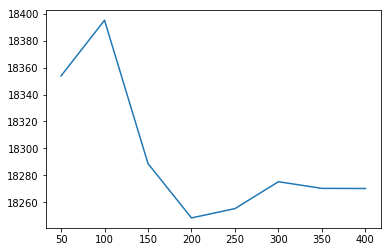

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results.keys(), results.values())
plt.show()

Given the results, which value for n_estimators seems best for the random forest model? Use your answer to set the value of n_estimators_best.

In [15]:
n_estimators_best = 200